<img src="https://user-images.githubusercontent.com/52746337/166633507-8610f330-cb2c-449c-8ca1-faecce779a54.png" width="400" align="center">

<h1><center>IBM-AWS Immersion Day Lab 4<br><br>Notebook 3 : Risk Index Prediction with Decision Tree</center></h1>

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of region and their total cases. Then you use the trained decision tree to predict the Risk Index of a region.

### Import required libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Load the dataset from Amazon S3 into pandas dataframe

>Note: you can add the comment `# @hidden_cell` in the below code cell. Cloud Pak for Data will automatically hide the cell before sharing it.

REGION  Total_cases  Risk_Index
0  Brussels          119           0
1  Flanders          461           2
2  Wallonia          383           1
3  Brussels          238           0
4  Flanders          794           2
5  Wallonia          568           1
6  Brussels          219           0
7  Flanders         1414           2
8  Wallonia          654           1
9  Brussels          346           0

In [3]:
my_data = data_df_1

#### Size of the Data

In [4]:
my_data.shape

(2220, 3)

<div href="pre-processing">
    <h2>Data Pre-processing</h2>
</div>

Using <b>my_data</b> read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [5]:
X = my_data[['REGION', 'Total_cases']].values
X[0:5]

array([['Brussels', 119],
       ['Flanders', 461],
       ['Wallonia', 383],
       ['Brussels', 238],
       ['Flanders', 794]], dtype=object)

As you may figure out, some features in this dataset are categorical such as __Brussels__ or __Wallonia__ or __Flanders__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [6]:
from sklearn import preprocessing
le_region = preprocessing.LabelEncoder()
le_region.fit(['Brussels','Flanders', 'Wallonia'])
X[:,0] = le_region.transform(X[:,0]) 

X[0:5]

array([[0, 119],
       [1, 461],
       [2, 383],
       [0, 238],
       [1, 794]], dtype=object)

Now we can fill the target variable.

In [7]:
y = my_data["Risk_Index"]
y[0:5]

0    0
1    2
2    1
3    0
4    2
Name: Risk_Index, dtype: int32

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [8]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
print(X_trainset.shape, y_trainset.shape, sep="\n")

(1554, 2)
(1554,)


In [11]:
print(X_testset.shape, y_testset.shape, sep="\n")

(666, 2)
(666,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>riskIndexTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [12]:
riskIndexTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
riskIndexTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [13]:
riskIndexTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [14]:
predTree = riskIndexTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [15]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 0 1 2]
1821    1
1830    1
1903    0
1452    1
175     2
Name: Risk_Index, dtype: int32


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8618618618618619


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

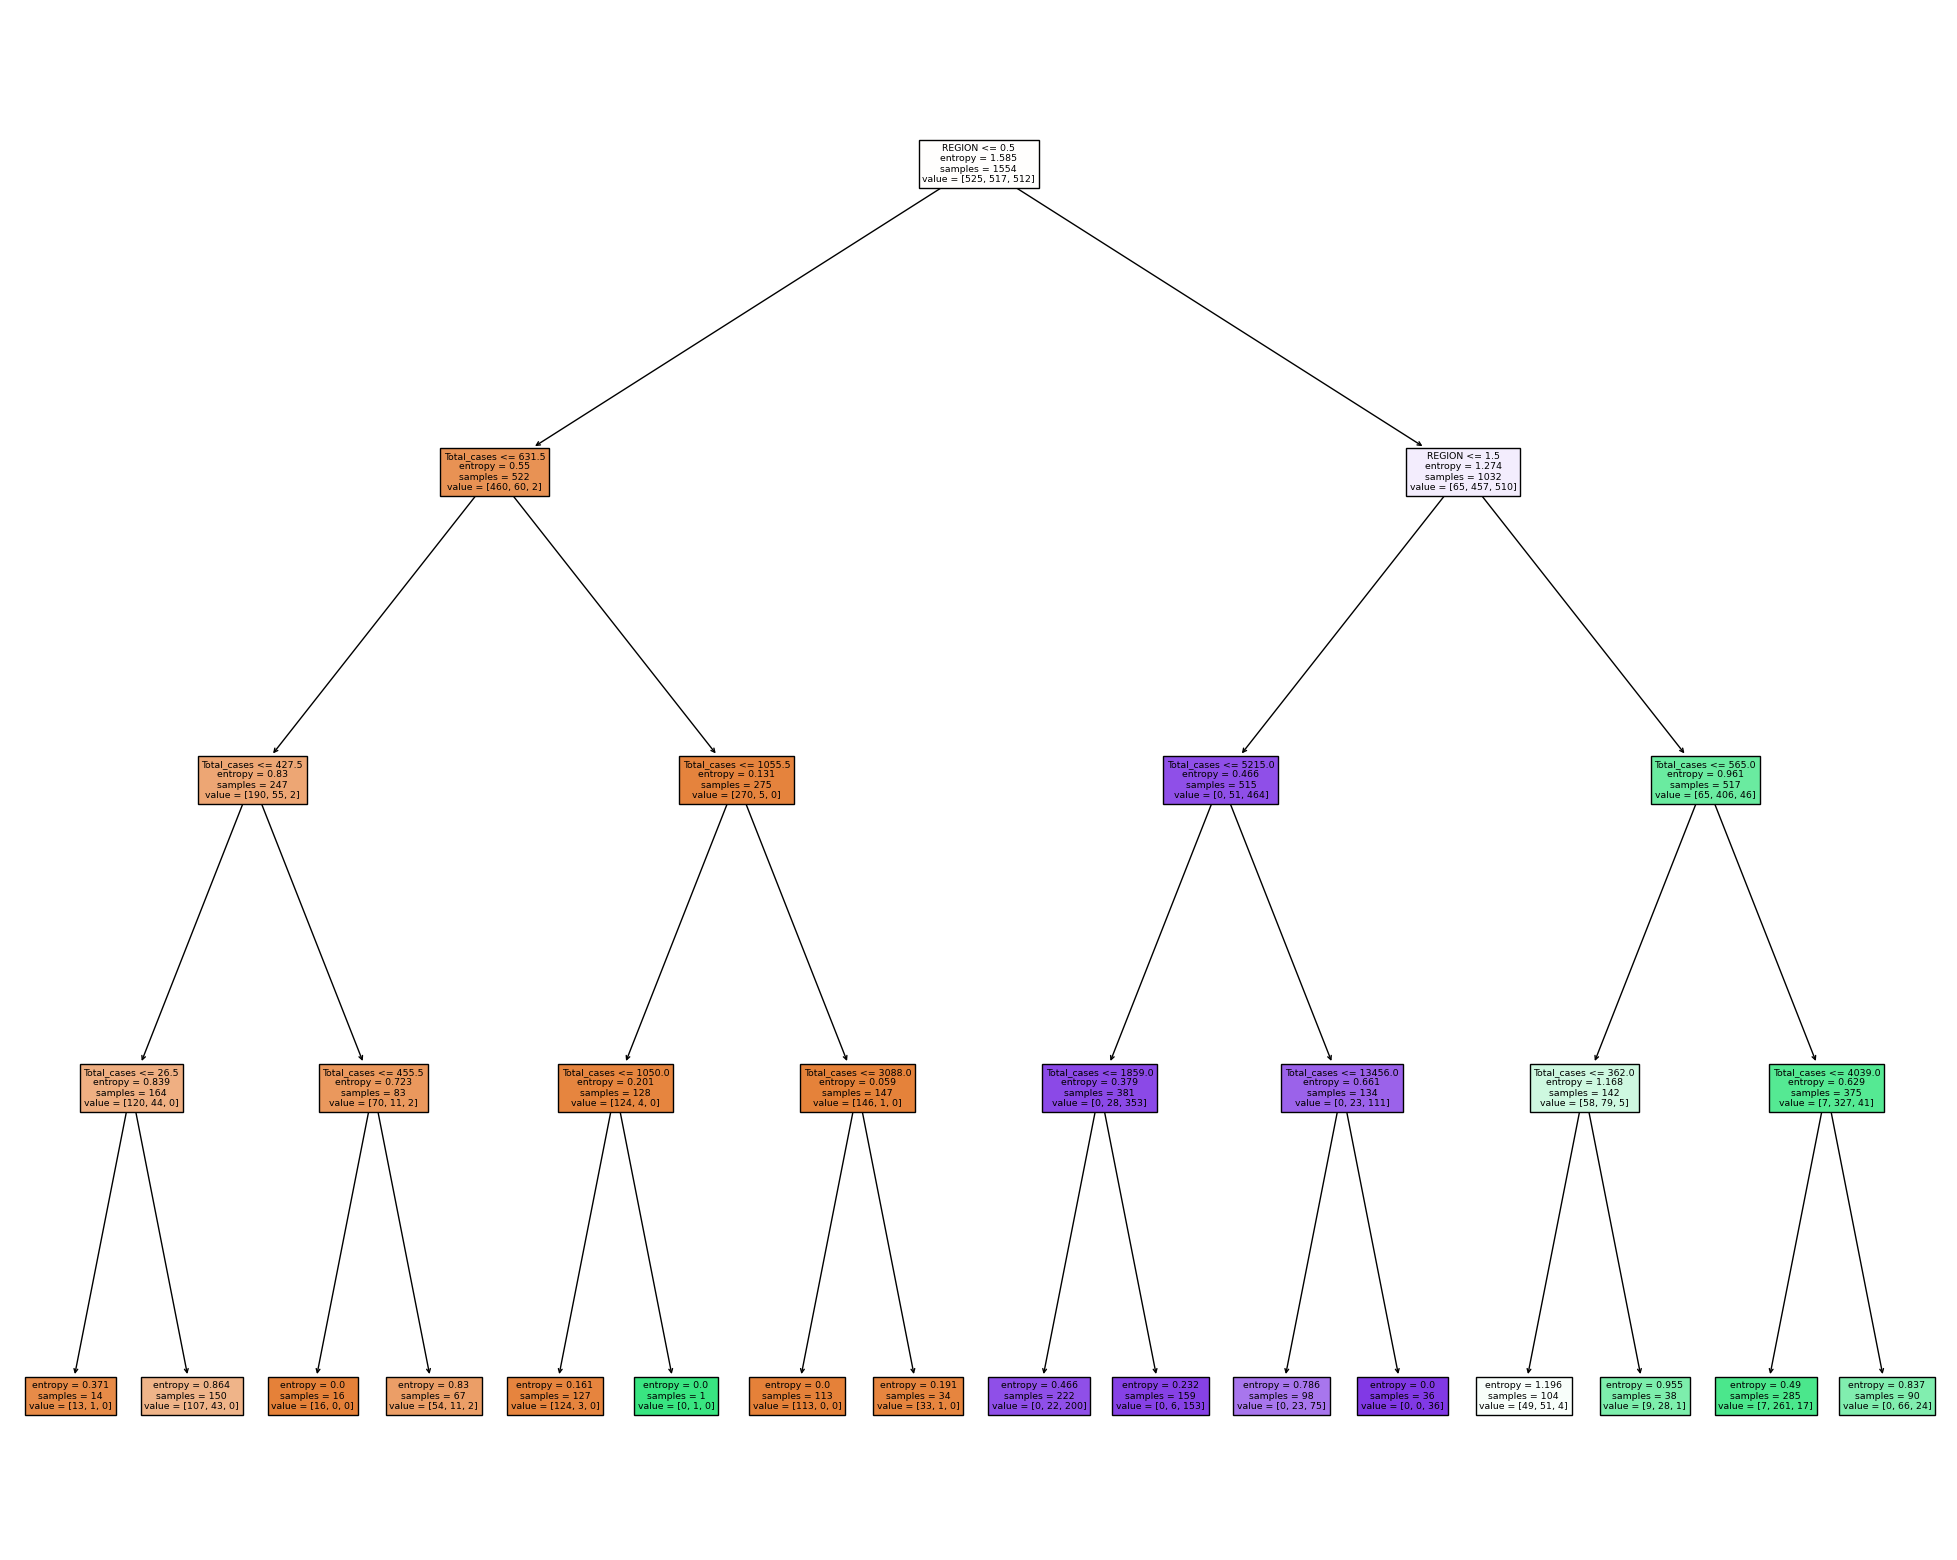

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(riskIndexTree, feature_names=my_data.columns[0:5], filled=True)

<h2>Want to learn more?</h2>

The AutoAI graphical tool in Watson Studio analyzes your data and discovers data transformations, algorithms, and parameter settings that work best for your predictive modeling problem. AutoAI displays the results as model candidate pipelines ranked on a leaderboard for you to choose from.

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this Lab!</h3>

<h4>Author:  <a href="https://linkedin.com/in/manojjahgirdar">Manoj Jahgirdar</a> & <a href="https://www.linkedin.com/in/sharath-kumar-rk-52aa2562/"> Sharath Kumar RK</a></h4>

